In [2]:
import sys
sys.path.append("../source")

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab
from tqdm import trange
import scipy
import scipy.stats as stats
from scipy.stats import bernoulli
import matplotlib as mp
from numba import njit
from project_lib import *
import pandas as pd

In [12]:
def init_unif_distrib_consensus_data(unif_distib_consensus_data, experiment, N, alpha, beta, R):
    if not ((unif_distib_consensus_data['N'] == N) 
            & (unif_distib_consensus_data['eps'] == R)
            ).any():
        unif_distib_consensus_data.at[experiment, "N"] = N
        unif_distib_consensus_data.at[experiment, "eps"] = R
        unif_distib_consensus_data.at[experiment, "consensus_x"] = 0
        unif_distib_consensus_data.at[experiment, "consensus_y"] = 0
        unif_distib_consensus_data.at[experiment, "consensus_probabity"] =0
        unif_distib_consensus_data.at[experiment, "simulation_time"] =0
        unif_distib_consensus_data.at[experiment, "simulation_count"] = 0

def update_unif_distrib_consensus_data(unif_distib_consensus_data, experiment, res_arr_fast):
    unif_distib_consensus_data.at[experiment, "consensus_x"] += res_arr_fast[-1, 0, 0]
    unif_distib_consensus_data.at[experiment, "consensus_y"] += res_arr_fast[-1, 0, 1]
    unif_distib_consensus_data.at[experiment, "consensus_probabity"] +=1
    unif_distib_consensus_data.at[experiment, "simulation_time"] +=res_arr_fast.shape[0]
    


dtypes = {
    'N': np.int64,
    'eps': np.float64,
    'consensus_x': np.float64,
    'consensus_y': np.float64,
    'consensus_probabity': np.float64,
    'simulation_time': np.int64,
    'simulation_count': np.int64
}

In [20]:
unif_distib_consensus_data = pd.DataFrame(columns=["N", "eps", "consensus_x", "consensus_y","consensus_probabity", "simulation_time", "simulation_count"], dtype=object)
unif_distib_consensus_data.to_csv('unif_distib_consensus_data.csv',sep=";", index=False)
unif_distib_consensus_data

,N,eps,consensus_x,consensus_y,consensus_probabity,simulation_time,simulation_count


In [15]:
R = 0.2  # радиус доверия
eps = 1e-4  # допустимая точность
n = 50  # количество агентов по одной оси
N = n

In [16]:
experiments = 200
R_array = np.arange(0.15, 1.01, 0.05)
beta_params_array =  np.arange(0.5, 5.1, 0.5)
beta_params_array

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [28]:
unif_distib_consensus_data.to_csv('unif_distib_consensus_data.csv',sep=";", index=False)


In [23]:
experiment = 0

simulation_func = HK_2D_sim_fast
count_consensus = 0
CONSENSUS_BORDER = 5
for R in R_array:
    init_unif_distrib_consensus_data(unif_distib_consensus_data, experiment, N, alpha, beta, R)
    if count_consensus>=CONSENSUS_BORDER: simulation_func=HK_2D_sim
    print(f"N:{N} R:{R} a:{alpha} b:{beta} func:{simulation_func.__name__} count:{count_consensus}")

    for i in trange(experiments):
        x0 = np.random.uniform(0,1,(N,2))
        res_arr_fast, check_fast = simulation_func(x0, R, R * 1e-3, 1000)
        if check_fast:
            cluster_of_agent, cluster_sizes = caln_n_clusters(res_arr_fast[-1, :, :], R)
            experiment = unif_distib_consensus_data[
                ((unif_distib_consensus_data['N'] == N) 
                    & (unif_distib_consensus_data['eps'] == R))].index[0]
            unif_distib_consensus_data.at[experiment, "simulation_count"] +=1
            if len(cluster_sizes)==1:
                # we have consensus
                count_consensus+=1
                update_unif_distrib_consensus_data(unif_distib_consensus_data, experiment, res_arr_fast)
        else:
            draw_HK_2D_simulation(res_arr_fast, 'plasma')
    experiment = unif_distib_consensus_data.index[-1] +1
unif_distib_consensus_data

N:50 R:0.15 a:0.5 b:0.5 func:HK_2D_sim_fast count:0


100%|██████████| 200/200 [00:00<00:00, 282.26it/s]


N:50 R:0.2 a:0.5 b:0.5 func:HK_2D_sim_fast count:0


100%|██████████| 200/200 [00:00<00:00, 239.23it/s]


N:50 R:0.25 a:0.5 b:0.5 func:HK_2D_sim_fast count:0


100%|██████████| 200/200 [00:01<00:00, 185.51it/s]


N:50 R:0.30000000000000004 a:0.5 b:0.5 func:HK_2D_sim_fast count:1


100%|██████████| 200/200 [00:01<00:00, 128.46it/s]


N:50 R:0.3500000000000001 a:0.5 b:0.5 func:HK_2D_sim count:57


100%|██████████| 200/200 [00:01<00:00, 114.69it/s]


N:50 R:0.40000000000000013 a:0.5 b:0.5 func:HK_2D_sim count:212


100%|██████████| 200/200 [00:01<00:00, 180.27it/s]


N:50 R:0.45000000000000007 a:0.5 b:0.5 func:HK_2D_sim count:411


100%|██████████| 200/200 [00:00<00:00, 213.43it/s]


N:50 R:0.5000000000000001 a:0.5 b:0.5 func:HK_2D_sim count:611


100%|██████████| 200/200 [00:00<00:00, 227.09it/s]


N:50 R:0.5500000000000002 a:0.5 b:0.5 func:HK_2D_sim count:811


100%|██████████| 200/200 [00:00<00:00, 230.07it/s]


N:50 R:0.6000000000000002 a:0.5 b:0.5 func:HK_2D_sim count:1011


100%|██████████| 200/200 [00:00<00:00, 239.10it/s]


N:50 R:0.6500000000000002 a:0.5 b:0.5 func:HK_2D_sim count:1211


100%|██████████| 200/200 [00:00<00:00, 288.09it/s]


N:50 R:0.7000000000000002 a:0.5 b:0.5 func:HK_2D_sim count:1411


100%|██████████| 200/200 [00:00<00:00, 291.71it/s]


N:50 R:0.7500000000000002 a:0.5 b:0.5 func:HK_2D_sim count:1611


100%|██████████| 200/200 [00:00<00:00, 288.35it/s]


N:50 R:0.8000000000000003 a:0.5 b:0.5 func:HK_2D_sim count:1811


100%|██████████| 200/200 [00:00<00:00, 284.70it/s]


N:50 R:0.8500000000000002 a:0.5 b:0.5 func:HK_2D_sim count:2011


100%|██████████| 200/200 [00:00<00:00, 282.91it/s]


N:50 R:0.9000000000000002 a:0.5 b:0.5 func:HK_2D_sim count:2211


100%|██████████| 200/200 [00:00<00:00, 289.42it/s]


N:50 R:0.9500000000000003 a:0.5 b:0.5 func:HK_2D_sim count:2411


100%|██████████| 200/200 [00:00<00:00, 293.16it/s]


N:50 R:1.0000000000000002 a:0.5 b:0.5 func:HK_2D_sim count:2611


100%|██████████| 200/200 [00:00<00:00, 289.36it/s]


,N,eps,consensus_x,consensus_y,consensus_probabity,simulation_time,simulation_count
0,50,0.15,0,0,0,0,200
1,50,0.2,0,0,0,0,200
2,50,0.25,0.522432,0.459108,1,10,200
3,50,0.3,28.444537,28.194056,56,514,200
4,50,0.35,77.673857,78.457409,155,1053,200
5,50,0.4,100.175477,98.959998,199,1045,200
6,50,0.45,99.545035,100.092801,200,871,200
7,50,0.5,100.553961,100.384974,200,803,200
8,50,0.55,99.837694,99.178135,200,795,200
9,50,0.6,99.623504,98.789098,200,724,200


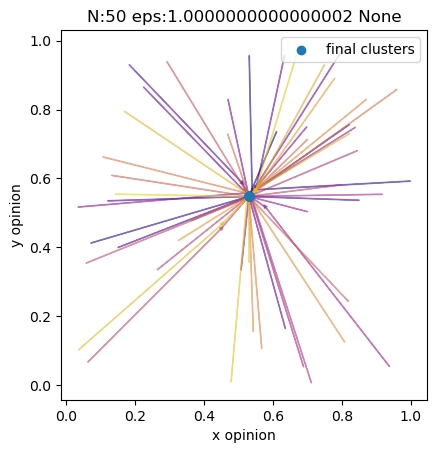

In [24]:
experiment = 0
res_arr_fast, check_fast = HK_2D_sim_fast(x0, R, R * 1e-3, 1000)

np.save(f"2dHKN{N}R{R}_beta_a{alpha}_b{beta}.npy", res_arr_fast)

draw_HK_2D_simulation(res_arr_fast,N=N, R=R,cmap='plasma')
cluster_of_agent, cluster_sizes = caln_n_clusters(res_arr_fast[-1, :, :], R)

In [27]:
data = unif_distib_consensus_data
N50 = data[data['N'] == N]
pivot_data = N50.pivot(index='eps', columns='consensus_probabi', values='consensus_probabity')
pivot_data

c:\Users\anast\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


N,50
eps,
0.15,0
0.20,0
0.25,1
0.30,56
0.35,155
0.40,199
0.45,200
0.50,200
0.55,200


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


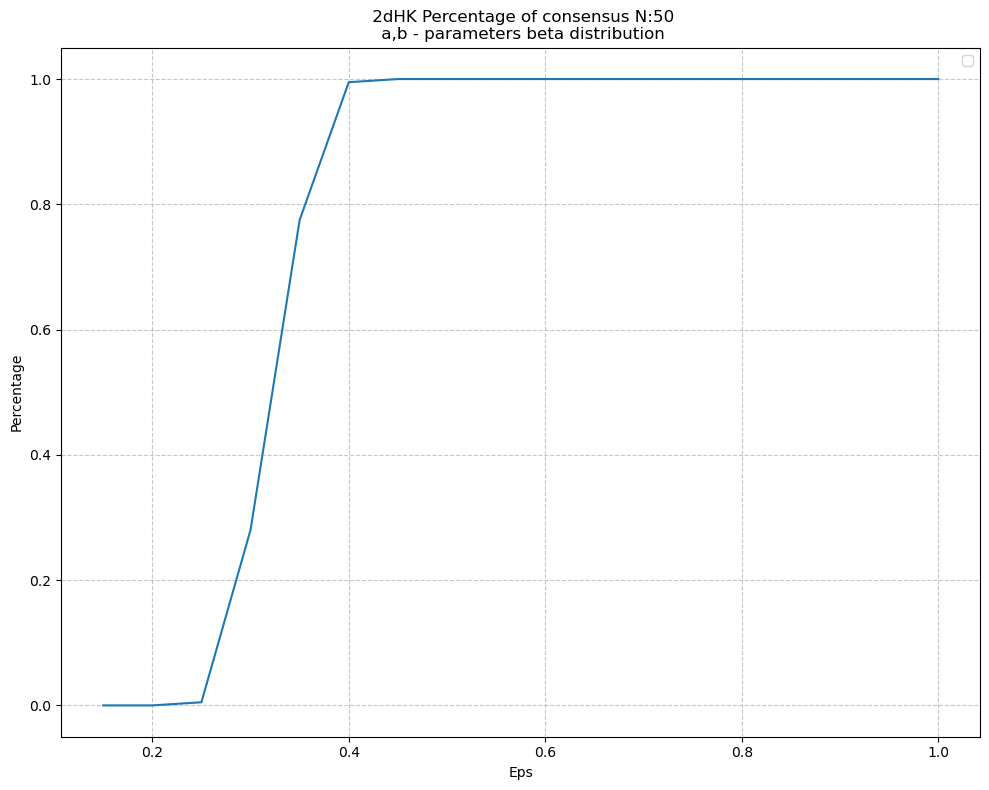

In [29]:
plt.figure(figsize=(10, 8))

cmap = mp.cm.get_cmap("plasma")
norm=plt.Normalize(vmin=0.15, vmax=5.5)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Plot lines for each beta value
df = data.query('N == @N')
plt.plot(df['eps'], df['consensus_probabity']/df['simulation_count'],  )

# Adding the HK_sample line (you'll need to adjust this based on your actual data)
plt.title(f' 2dHK Percentage of consensus N:{N}\n a,b - parameters beta distribution')
plt.xlabel('Eps')
plt.ylabel('Percentage')
plt.legend()
# Add a grid
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()